<a href="https://colab.research.google.com/github/mwzkhalil/English-to-Urdu/blob/main/SberOCR_Test_VLM_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UniChart fine-tuning on ChartQA dataset.

## Introduction  

This notebook demonstrates the process of fine-tuning the UniChart model on the ChartQA dataset.  

**Objective:**  
To solve the Chart Question Answering task using a Vision Language Model (VLM).  

Links to the resources, as well as the authors of the model and dataset used in this work, will be provided at the end of the notebook.  

## VLM Structure  

### **Vision Language Models (VLM) Architecture**  

**1. Image Encoder:**  
   - Encodes an image into a vector representation suitable for processing by a neural network. Typically, CNNs or transformer-based models are used.  

**2. Text Encoder:**  
   - Processes textual data and converts it into vector representations. This often involves transformer models like BERT or GPT.  

**3. Multimodal Integrator:**  
   - Combines the image and text representations into a unified vector space. This can be achieved through methods like concatenation, attention mechanisms, or other neural network strategies.  

**4. Decoder:**  
   - Generates text based on the multimodal representation. A transformer-based architecture is commonly used for decoding.  

### **Training Vision Language Models**  

**1. Pretraining:**  
   - Models are pretrained on large datasets containing image-text pairs to learn fundamental representations. Examples include datasets with image captions.  

**2. Fine-Tuning:**  
   - Models are fine-tuned for specific tasks like image captioning, visual question answering (VQA), or text generation based on images. This step helps the model adapt to particular tasks and improve its performance.  

### **Examples of Models**  

**LLaVA:**  
   - Uses CLIP as the image encoder and Vicuna as the text decoder. The model undergoes a question-answer generation phase using GPT-4 and is subsequently fine-tuned.  

**KOSMOS-2:**  
   - Trained end-to-end, integrating all components into a unified training process.  

### **Key Training Steps**  

1. **Data Collection:** Gather image-text pairs.  
2. **Pretraining:** Train models on large-scale datasets.  
3. **Fine-Tuning:** Fine-tune the model for specialized tasks.  

## Model Description  

**UniChart** is a Vision-Language Model (VLM) specifically trained for working with charts. Initially, it is capable of efficiently summarizing information from charts. However, after fine-tuning on the ChartQA dataset, it provides confident and accurate answers to straightforward questions about charts.  

The model's architecture incorporates the following components:  
- **Model:** `VisionEncoderDecoderModel`  
- **Processor:** `DonutProcessor`  
- **Config:** `BartConfig`  

From this, the principle of how VLMs work becomes clear.  

VLMs are models that can simultaneously learn from images and text to solve a wide range of tasks, from visual question answering to generating captions for images.  

In a broad sense, VLMs (Vision-Language Models) are multimodal models capable of learning from both images and text. These are a type of generative models that take images and text as input and generate text as output.  

Use cases include image-based chat discussions, image recognition via instructions, visual question answering, document understanding, image captioning, and more. These models can also output bounding boxes or segmentation masks when tasked with detecting or segmenting specific objects. Additionally, they can localize various objects or answer questions about their relative or absolute positions.

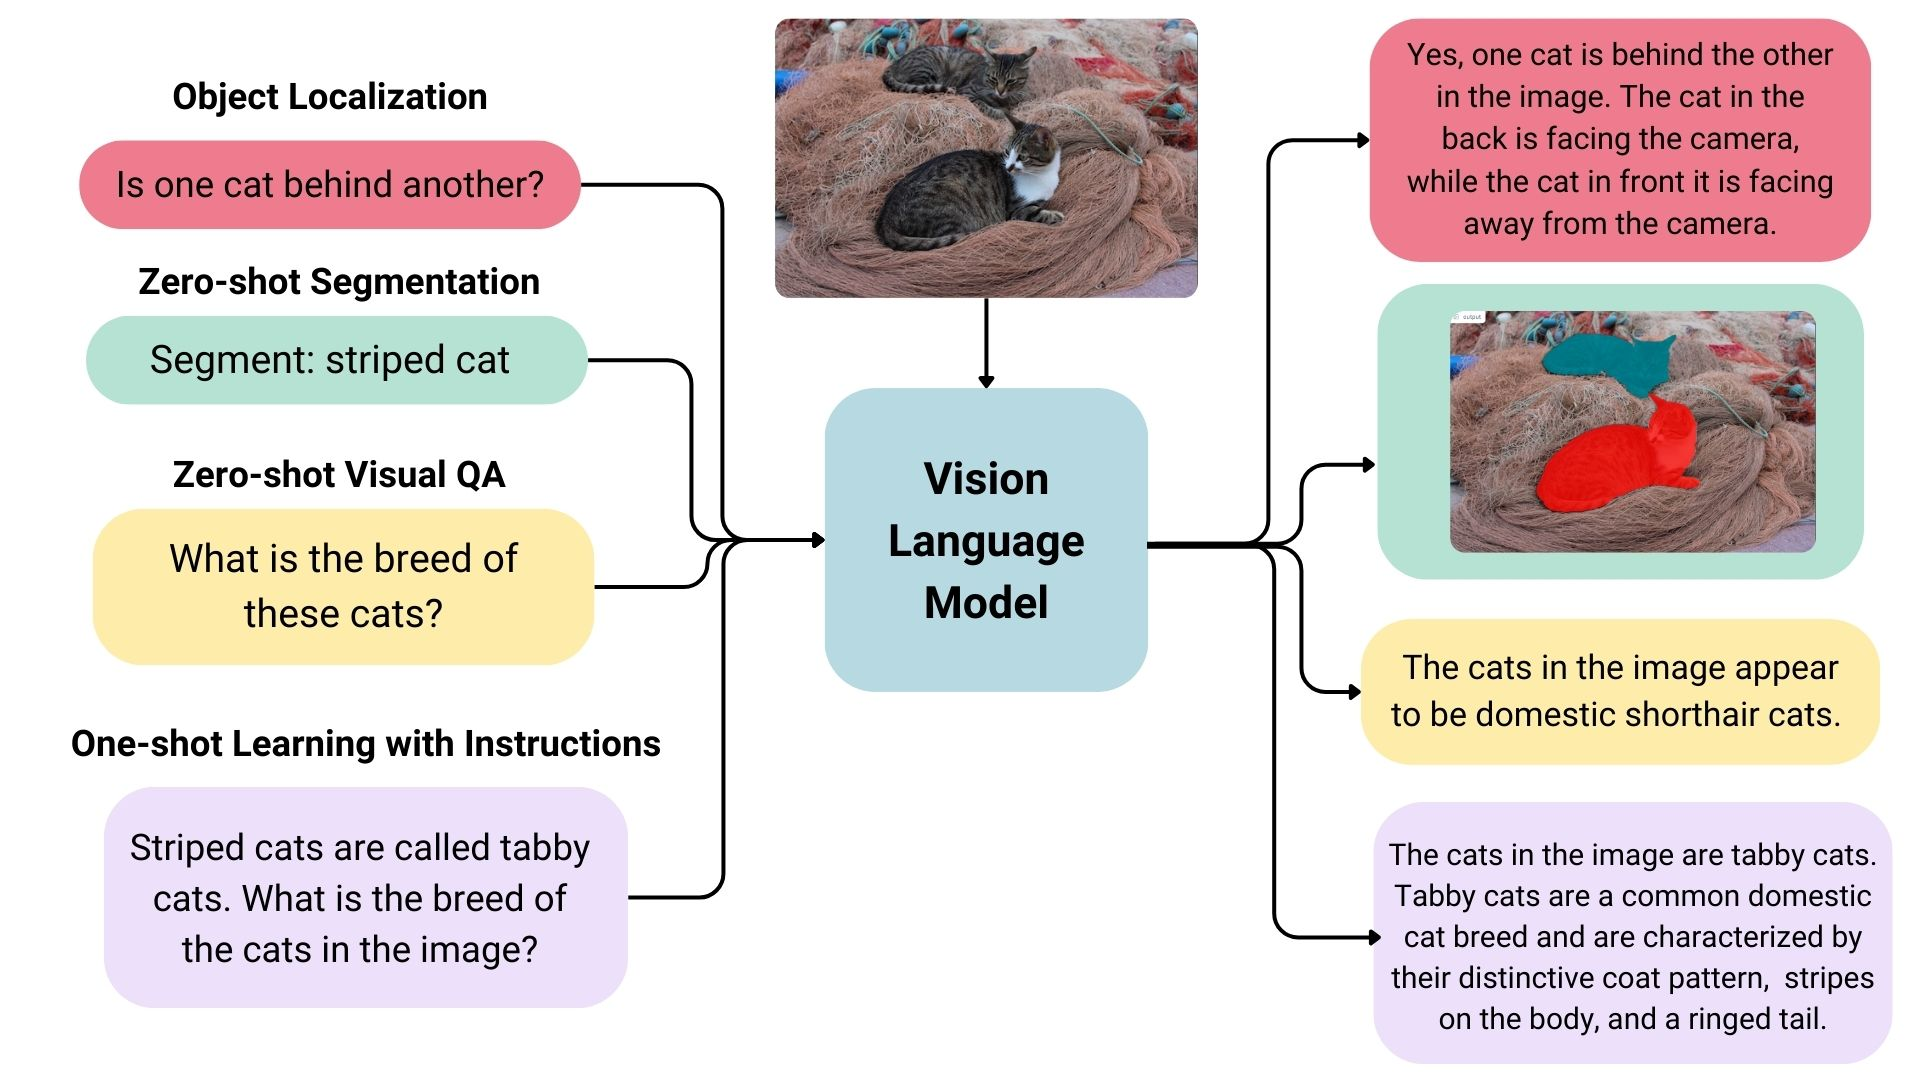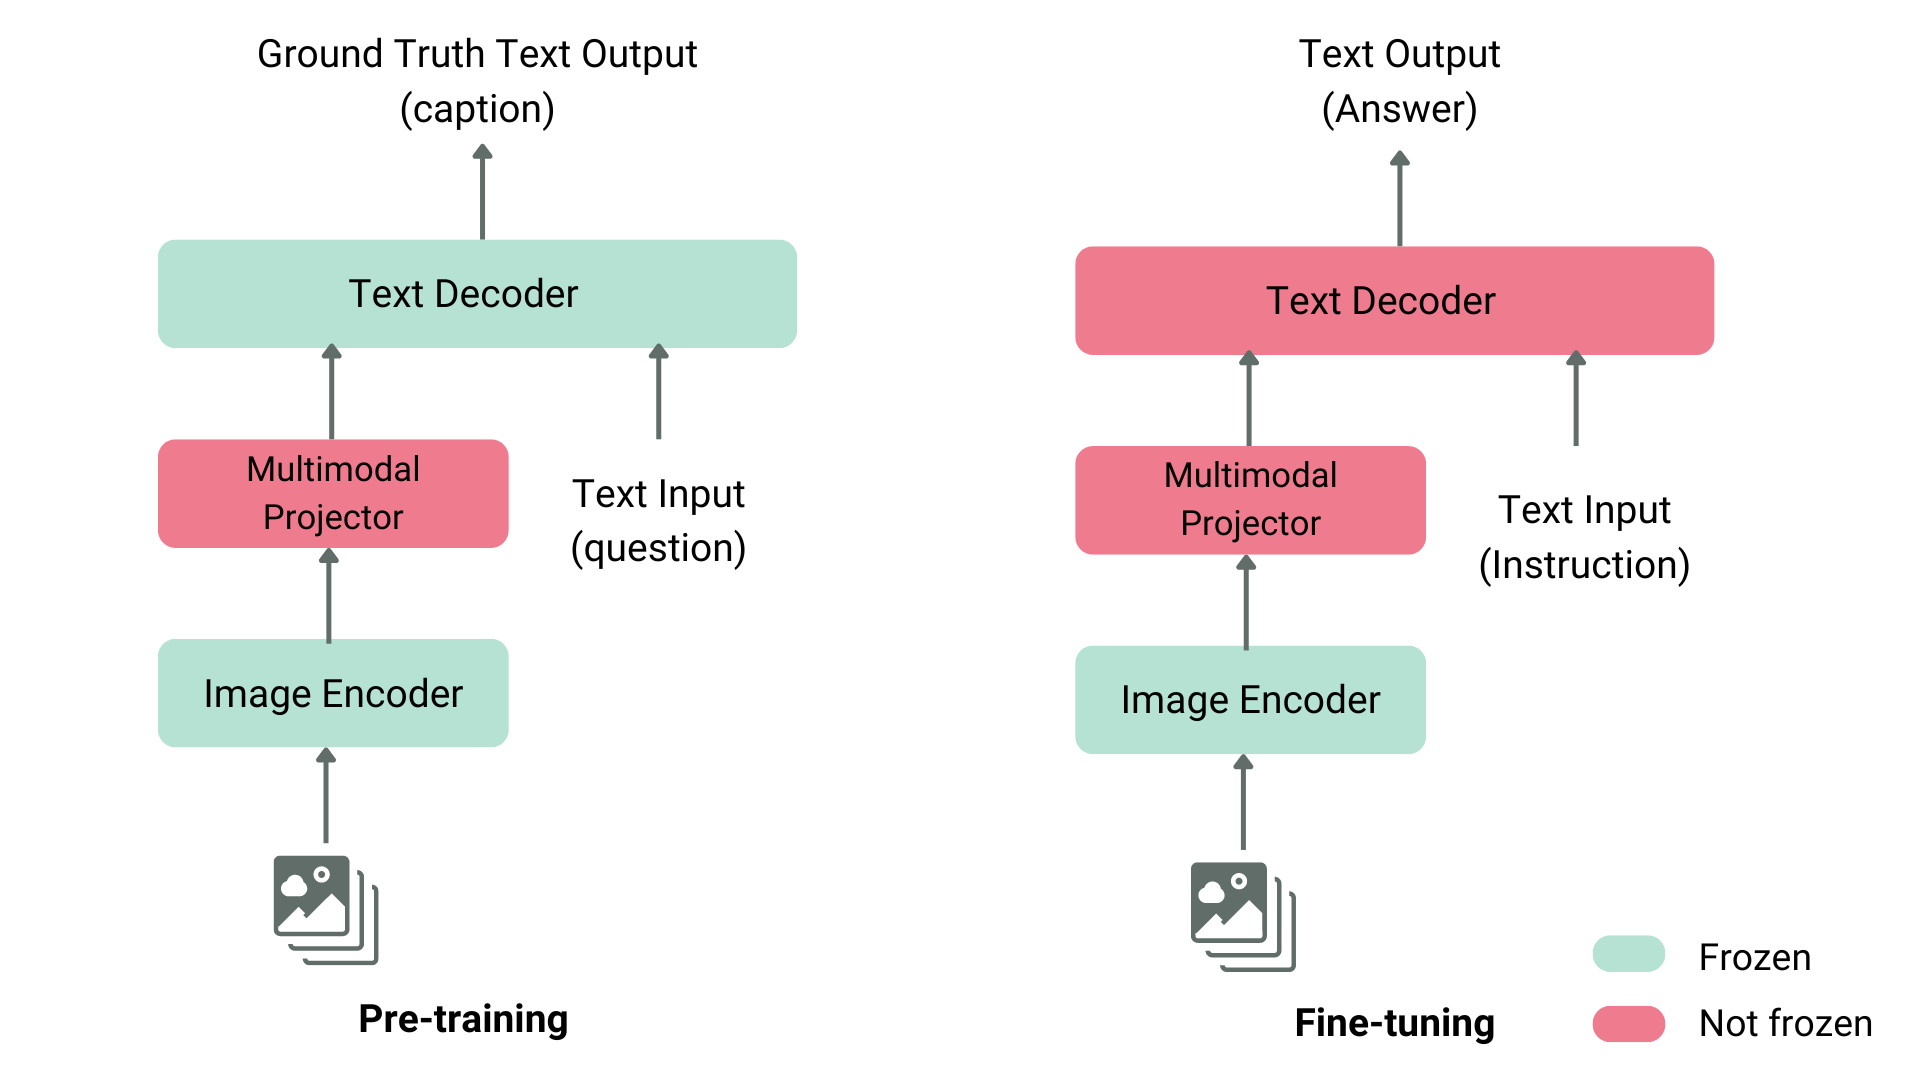

The pictures above show typical VLM tasks, as well as the typical structure of such a model.

### Model evaluation:

Relevance: the model was developed specifically for this task and was trained on VQA datasets and parts/similars of ChartQA (as will be seen in the tests at the end)
Size: 490Mb, 200M parameters

**Ease of Fine-Tuning:** Given the straightforward data architecture, fine-tuning the model is relatively simple. The only significant drawback is that, despite its modest size of 200 million parameters by today's standards, the model utilized nearly all available RAM and 15 GB of GPU memory in Google Colab with just 100 training examples.  

These limitations of Colab dictated the fine-tuning conditions in this notebook. However, I believe this is more than sufficient for understanding the pipeline and addressing the task at hand.

P.S. Initially, an attempt was made to use the more lightweight ViLT, but UniChart is a more relevant model, and is also easier to train on ChartQA (since they are created for each other)


## Dataset description

The ChartQA dataset contains approximately 30,000 various types of charts with comprehensive annotations. In theory, this enables training much more complex models and ensembles, as it includes data on charts in .csv format, annotations with bounding boxes, and more.  

However, for training UniChart, only question/answer pairs are required. Fine-tuning UniChart on the full dataset in Colab is both time-consuming and inefficient (an attempt was made, but it proved unsuccessful due to insufficient memory and resources).  

Thus, a selection of 100 images was chosen for training, 10 for validation, and 100 for testing.

The choice of dataset is obvious, since the model and dataset are ideal for each other, and it also contains unambiguous and simple answers to questions. In general, relevance does not need reinforcement.

### **A more detailed description of the model and dataset can be found on GitHub, links to repositories are listed at the end.**

## Solution

### Installing libraries

In [1]:
!pip install transformers==4.28.1 datasets torch pytorch-lightning==1.8.5 sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.4/800.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.

### Transferring the dataset to the Colab working environment

In [3]:
from google.colab import drive
from IPython.display import clear_output

drive.mount('/content/drive')
!cp /content/drive/MyDrive/ChartQA_Dataset.zip /content/
!unzip /content/ChartQA_Dataset.zip
# with zipfile.ZipFile('/content/ChartQA_Dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/')
clear_output()

### Initializing model components

#### Dataset class

In [4]:
import json, os
import random
from typing import Any, List, Tuple
from PIL import Image
import torch
from torch.utils.data import Dataset
from transformers import DonutProcessor
from datasets import load_dataset, load_from_disk

added_tokens = []

class ChartQADataset(Dataset):
    """
    """

    def __init__(
        self,
        dataset: str,
        images_folder: str,
        max_length: int,
        processor : DonutProcessor = None,
        split: str = "train",
        ignore_id: int = -100,
        prompt_end_token: str = None,
        task_prefix: str = '<chartqa>',
        sort_json_key: bool = True,
    ):
        super().__init__()

        self.max_length = max_length
        self.split = split
        self.ignore_id = ignore_id

        self.prompt_end_token = prompt_end_token
        self.sort_json_key = sort_json_key
        self.images_folder = images_folder


        self.dataset = dataset
        self.dataset_length = len(self.dataset)

        self.processor = processor
        self.prompt_end_token_id = self.processor.tokenizer.convert_tokens_to_ids(self.prompt_end_token)
        self.task_prefix = task_prefix


    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int):

        sample = self.dataset[idx]

        # input_tensor
        img_path = os.path.join(self.images_folder, sample['imgname'])
        img = Image.open(img_path)
        pixel_values = self.processor(img.convert("RGB"), random_padding=self.split == "train", return_tensors="pt").pixel_values
        input_tensor = pixel_values.squeeze()

        # input_ids
        processed_parse = self.task_prefix + " " + sample['query'] + " " + self.prompt_end_token + " " + sample['label'] + self.processor.tokenizer.eos_token
        input_ids = self.processor.tokenizer(
            processed_parse,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )["input_ids"].squeeze(0)

        if self.split == "train":
            labels = input_ids.clone()
            labels[
                labels == self.processor.tokenizer.pad_token_id
            ] = self.ignore_id  # model doesn't need to predict pad token
            labels[
                : torch.nonzero(labels == self.prompt_end_token_id).sum() + 1
            ] = self.ignore_id  # model doesn't need to predict prompt
            return input_tensor, input_ids, labels
        else:
            prompt_end_index = torch.nonzero(
                input_ids == self.prompt_end_token_id
            ).sum()  # return prompt end index instead of target output labels
            return input_tensor, input_ids, prompt_end_index, processed_parse

#### Model class

In [5]:
from pathlib import Path
import re
from nltk import edit_distance
import numpy as np
import math, os

from torch.nn.utils.rnn import pad_sequence
from torch.optim.lr_scheduler import LambdaLR
import torch
from torch.utils.data import DataLoader

import pytorch_lightning as pl
from pytorch_lightning.utilities import rank_zero_only


class ChartQAModule(pl.LightningModule):
    def __init__(self, config, processor, model, args, train_dataset, val_dataset):
        super().__init__()
        self.config = config
        self.processor = processor
        self.model = model
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.args=args

    def training_step(self, batch, batch_idx):
        pixel_values, decoder_input_ids, labels = batch

        outputs = self.model(pixel_values,
                             decoder_input_ids=decoder_input_ids[:, :-1],
                             labels=labels[:, 1:])
        loss = outputs.loss
        self.log_dict({"train_loss": loss}, sync_dist=True)
        return loss

    def compute_metric(self, gt, pred):
      try:
        gt = float(gt)
        pred = float(pred)
        return abs(gt - pred) / abs(gt) <= 0.05
      except:
        return str(gt).lower() == str(pred).lower()

    def validation_step(self, batch, batch_idx, dataset_idx=0):
        pixel_values, decoder_input_ids, prompt_end_idxs, answers = batch
        decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

        outputs = self.model.generate(pixel_values,
                                   decoder_input_ids=decoder_prompts,
                                   max_length=self.args.max_length,
                                   early_stopping=True,
                                   pad_token_id=self.processor.tokenizer.pad_token_id,
                                   eos_token_id=self.processor.tokenizer.eos_token_id,
                                   use_cache=True,
                                   num_beams=4,
                                   bad_words_ids=[[self.processor.tokenizer.unk_token_id]],
                                   return_dict_in_generate=True,)

        predictions = []
        for seq in self.processor.tokenizer.batch_decode(outputs.sequences):
            seq = seq.replace(self.processor.tokenizer.eos_token, "").replace(self.processor.tokenizer.pad_token, "")
            predictions.append(seq)

        scores = list()
        for pred, answer in zip(predictions, answers):
            pred = pred.split("<s_answer>")[1]
            pred = pred.replace(self.processor.tokenizer.eos_token, "").replace("<s>", "").strip(' ')
            answer = answer.split("<s_answer>")[1]
            answer = answer.replace(self.processor.tokenizer.eos_token, "").strip(' ')
            if self.compute_metric(answer, pred):
              scores.append(1)
            else:
              scores.append(0)

        return scores

    def validation_epoch_end(self, validation_step_outputs):
        # I set this to 1 manually
        # (previously set to len(self.config.dataset_name_or_paths))
        num_of_loaders = 1
        if num_of_loaders == 1:
            validation_step_outputs = [validation_step_outputs]
        assert len(validation_step_outputs) == num_of_loaders
        cnt = [0] * num_of_loaders
        total_metric = [0] * num_of_loaders
        val_metric = [0] * num_of_loaders
        for i, results in enumerate(validation_step_outputs):
            for scores in results:
                cnt[i] += len(scores)
                total_metric[i] += np.sum(scores)
            val_metric[i] = total_metric[i] / cnt[i]
            val_metric_name = f"val_metric_{i}th_dataset"
            self.log_dict({val_metric_name: val_metric[i]}, sync_dist=True)
        self.log_dict({"val_metric": np.sum(total_metric) / np.sum(cnt)}, sync_dist=True)
        print("Epoch:", str(self.current_epoch), "Step:", str(self.global_step), "Validation Metric:", str(np.sum(total_metric) / np.sum(cnt)))

    def configure_optimizers(self):

        max_iter = None

        if int(self.config.get("max_epochs", -1)) > 0:
            assert len(self.config.get("train_batch_sizes")) == 1, "Set max_epochs only if the number of datasets is 1"
            max_iter = (self.config.get("max_epochs") * self.config.get("num_training_samples_per_epoch")) / (
                self.config.get("train_batch_sizes")[0] * torch.cuda.device_count() * self.config.get("num_nodes", 1)
            )

        if int(self.config.get("max_steps", -1)) > 0:
            max_iter = min(self.config.get("max_steps"), max_iter) if max_iter is not None else self.config.get("max_steps")

        assert max_iter is not None
        optimizer = torch.optim.Adam(self.parameters(), lr=self.config.get("lr"))
        scheduler = {
            "scheduler": self.cosine_scheduler(optimizer, max_iter, self.config.get("warmup_steps")),
            "name": "learning_rate",
            "interval": "step",
        }
        return [optimizer], [scheduler]

    @staticmethod
    def cosine_scheduler(optimizer, training_steps, warmup_steps):
        def lr_lambda(current_step):
            if current_step < warmup_steps:
                return current_step / max(1, warmup_steps)
            progress = current_step - warmup_steps
            progress /= max(1, training_steps - warmup_steps)
            return max(0.0, 0.5 * (1.0 + math.cos(math.pi * progress)))

        return LambdaLR(optimizer, lr_lambda)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.args.batch_size, shuffle=True, num_workers=self.args.num_workers)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.args.valid_batch_size, shuffle=False, num_workers=self.args.num_workers)

    @rank_zero_only
    def on_save_checkpoint(self, checkpoint):
        save_path = os.path.join(self.config['result_path'], 'chartqa-checkpoint-epoch='+str(self.current_epoch)+'-'+str(self.global_step))
        self.model.save_pretrained(save_path)
        self.processor.save_pretrained(save_path)

#### Obtaining data for additional training

In [6]:
path1 = "/content/ChartQA Dataset/train/train_augmented.json"
path2 = "/content/ChartQA Dataset/train/train_human.json"
path3 = "/content/ChartQA Dataset/val/val_human.json"

with open(path1) as f:
    info_train_augmented = json.load(f)

with open(path2) as f:
    info_train_human = json.load(f)

with open(path3) as f:
    info_val_human = json.load(f)

print(f"Number of augmented train question/answer files: {len(info_train_augmented)}")
print(f"Number of human train question/answer files: {len(info_train_human)}")
print(f"Number of human val question/answer files: {len(info_val_human)}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/ChartQA Dataset/train/train_augmented.json'

#### Basic model/training code

In [ ]:
from transformers import VisionEncoderDecoderConfig
from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig
import argparse
from torch.utils.data import DataLoader
from typing import List
from datasets import load_dataset

# from data.chartqa_data import ChartQADataset
# from model.chartqa_model import ChartQAModule

import pytorch_lightning as pl

#from pytorch_lightning.loggers import WandbLogger
#from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.callbacks import ModelCheckpoint



def main():
  # Instantiate the parser
  parser = argparse.ArgumentParser(description='Train Chart Transformer')
  parser.add_argument('--data-path', type=str, default = "ahmed-masry/chartqa_without_images", help='Path to the data file')
  parser.add_argument('--train-images', type=str, default='/content/ChartQA/ChartQA Dataset/train/png/', help='Path to the training images')
  parser.add_argument('--valid-images', type=str, default='/content/ChartQA/ChartQA Dataset/val/png', help='Path to the validation images')

  parser.add_argument('--output-dir', type=str, default="/content/output_data", help='Path to the output directory for saving the checkpoints')
  parser.add_argument('--max-steps', type=int, default = 1000, help='Max number of iterations')
  parser.add_argument('--batch-size', type=int, default=2, help='Batch Size for the model')
  parser.add_argument('--valid-batch-size', type=int, default=2, help='Valid Batch Size for the model')
  parser.add_argument('--max-length', type=int, default=512, help='Max length for decoder generation')
  parser.add_argument('--num-workers', type=int, default=2, help='Number of workers')
  parser.add_argument('--lr', type=float, default=5e-5, help='learning rate')

  parser.add_argument('--check-val-every-n-epoch', type=int, default=1, help='Ru validation every n epochs')
  parser.add_argument('--log-every-n-steps', type=int, default=50, help='Log every n steps')
  parser.add_argument('--warmup-steps', type=int, default=50, help='Warmup steps')
  parser.add_argument('--checkpoint-steps', type=int, default=1000, help='Checkpoint steps')
  parser.add_argument('--gradient-clip-val', type=float, default=1.0, help='gradient clip value')

  parser.add_argument('--accumulate-grad-batches', type=int, default=1, help='accumulate grad batches')
  parser.add_argument('--gpus-num', type=int, default=1, help='gpus num')
  parser.add_argument('--nodes-num', type=int, default=1, help='nodes num')

  parser.add_argument('--checkpoint-path', type=str, default = "ahmed-masry/unichart-base-960", help='Path to the checkpoint')

  args = parser.parse_args()

  processor = DonutProcessor.from_pretrained(args.checkpoint_path)
  model = VisionEncoderDecoderModel.from_pretrained(args.checkpoint_path)

#   dataset = load_dataset(args.data_path)

  train = info_train_human[:100]
  val = info_val_human[:10]

  train_dataset = ChartQADataset(train, images_folder = args.train_images, processor = processor, max_length=args.max_length,
                              split="train", prompt_end_token="<s_answer>", task_prefix = "<chartqa>"
                              )

  val_dataset = ChartQADataset(val, images_folder = args.valid_images, processor = processor, max_length=args.max_length,
                              split="valid", prompt_end_token="<s_answer>", task_prefix = "<chartqa>"
                              )


  config = {"max_steps":args.max_steps,
            "check_val_every_n_epoch":args.check_val_every_n_epoch,
            "log_every_n_steps":args.log_every_n_steps,
            "gradient_clip_val":args.gradient_clip_val,
            "num_training_samples_per_epoch": len(train),
            "lr":args.lr,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": args.nodes_num,
            "warmup_steps": args.warmup_steps,
            "result_path": args.output_dir,
            "verbose": True,
          }

  model_module = ChartQAModule(config, processor, model, args, train_dataset, val_dataset)

  # wandb_logger = WandbLogger(project="UniChart-ChartQA")
  # lr_callback = LearningRateMonitor(logging_interval="step")
  checkpoint_callback = ModelCheckpoint(dirpath=args.output_dir, every_n_train_steps = args.checkpoint_steps, save_last = True, save_top_k = -1)

  trainer = pl.Trainer(
        accelerator="gpu",
        devices=1,
        max_steps=args.max_steps,
        check_val_every_n_epoch=args.check_val_every_n_epoch,
        # val_check_interval=100,
        log_every_n_steps=args.log_every_n_steps,
        gradient_clip_val=args.gradient_clip_val,

        num_nodes=args.nodes_num,
        precision=16, # we'll use mixed precision
        num_sanity_val_steps=0,
        #enable_checkpointing=True,
        default_root_dir=args.output_dir,
        # logger=wandb_logger,
        callbacks=[checkpoint_callback],
  )

  trainer.fit(model_module)

### Initialization of the additional training process

In [ ]:
# Simulate command-line arguments in a Colab cell
import sys
args = [
    '--data-path', 'ahmed-masry/chartqa_without_images',
    '--train-images', '/content/ChartQA Dataset/train/png/',
    '--valid-images', '/content/ChartQA Dataset/val/png',
    '--max-steps', '1000',
    '--batch-size', '2',
    '--valid-batch-size', '2',
    '--num-workers', '2',
    '--lr', '5e-5',
    '--check-val-every-n-epoch', '1',
    '--warmup-steps', '50',
    '--checkpoint-steps', '1000',
    '--checkpoint-path', 'ahmed-masry/unichart-base-960'
]

# Set sys.argv to simulate command-line arguments
sys.argv = [''] + args

# Run the main function
main()

INFO:pytorch_lightning.utilities.rank_zero:ModelCheckpoint(save_last=True, save_top_k=-1, monitor=None) will duplicate the last checkpoint saved.
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit native Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:604: UserWarning: Checkpoint directory /content/output_data exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                      | Params
--------

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch: 0 Step: 50 Validation Metric: 0.1


Validation: 0it [00:00, ?it/s]

Epoch: 1 Step: 100 Validation Metric: 0.1


Validation: 0it [00:00, ?it/s]

Epoch: 2 Step: 150 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 3 Step: 200 Validation Metric: 0.1


Validation: 0it [00:00, ?it/s]

Epoch: 4 Step: 250 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 5 Step: 300 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 6 Step: 350 Validation Metric: 0.0


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7846e00e81f0>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7846e00e81f0>Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    
self._shutdown_workers()
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
if w.is_alive():    
self._shutdown_workers()  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive

      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
assert self._parent_pid == os.getpid(), 'can only test a child process'    
if w.is_alive():AssertionError
: can only test a child process  File "/usr/lib/p

Validation: 0it [00:00, ?it/s]

Epoch: 7 Step: 400 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 8 Step: 450 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 9 Step: 500 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 10 Step: 550 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 11 Step: 600 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 12 Step: 650 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 13 Step: 700 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 14 Step: 750 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 15 Step: 800 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 16 Step: 850 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 17 Step: 900 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

Epoch: 18 Step: 950 Validation Metric: 0.0


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch: 19 Step: 1000 Validation Metric: 0.0


In [ ]:
!cp -r /content/output_data/chartqa-checkpoint-epoch=19-1000 /content/drive/MyDrive/


In [ ]:
!cp -r /content/output_data/epoch=19-step=1000.ckpt /content/drive/MyDrive/


## First works of beautiful models (in the box xD)

In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel
from PIL import Image
import torch, os, re

torch.hub.download_url_to_file('https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/multi_col_1229.png', 'chart_example_1.png')

model_name = "ahmed-masry/unichart-chartqa-960"
image_path = "/content/chart_example_1.png"
input_prompt = "<chartqa> What is the lowest value in blue bar? <s_answer>"

model = VisionEncoderDecoderModel.from_pretrained("/content/output_data/chartqa-checkpoint-epoch=19-1000")
processor = DonutProcessor.from_pretrained("/content/output_data/chartqa-checkpoint-epoch=19-1000")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

image = Image.open(image_path).convert("RGB")
decoder_input_ids = processor.tokenizer(input_prompt, add_special_tokens=False, return_tensors="pt").input_ids
pixel_values = processor(image, return_tensors="pt").pixel_values

outputs = model.generate(
    pixel_values.to(device),
    decoder_input_ids=decoder_input_ids.to(device),
    max_length=model.decoder.config.max_position_embeddings,
    early_stopping=True,
    pad_token_id=processor.tokenizer.pad_token_id,
    eos_token_id=processor.tokenizer.eos_token_id,
    use_cache=True,
    num_beams=4,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
    return_dict_in_generate=True,
)
sequence = processor.batch_decode(outputs.sequences)[0]
sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
sequence = sequence.split("<s_answer>")[1].strip()
print(sequence)


100%|██████████| 34.2k/34.2k [00:00<00:00, 57.9MB/s]


6


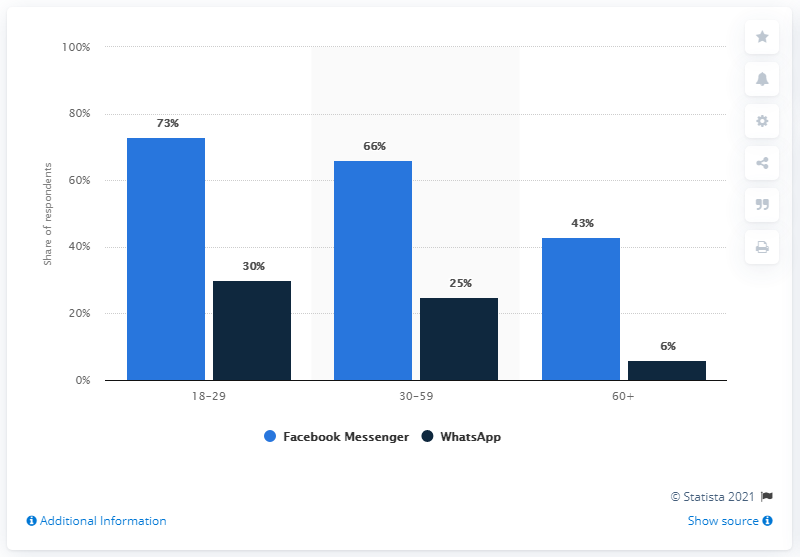

In [ ]:
image

As we can see, the model gave the correct answer (this is not surprising, because this image was most likely used to train its pretrain)

#### Auxiliary model initializations

In [ ]:
# # Дообученная модель
# model_name = "/content/output_data/chartqa-checkpoint-epoch=19-1000"
# model = VisionEncoderDecoderModel.from_pretrained(model_name)
# processor = DonutProcessor.from_pretrained(model_name)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# # Изначальная модель
# model_name = model_name = "ahmed-masry/unichart-chartqa-960"
# model = VisionEncoderDecoderModel.from_pretrained(model_name)
# processor = DonutProcessor.from_pretrained(model_name)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

## Testing different versions of the model: pretrain, additionally trained by me. and a trained developer on 8 GPUs and a full dataset.

#### We create a test dataset to test the pre-trained and post-trained models. We get the metrics on the train from the same ones that we used for training.

In [ ]:
import json

test_dataset = []

with open("/content/ChartQA Dataset/test/test_human.json") as f:
    test_human = json.load(f)

with open("/content/ChartQA Dataset/test/test_augmented.json") as f:
    test_augmented = json.load(f)

print(len(test_augmented))

unique_set = set()

for q in test_augmented:
    if q["imgname"] in unique_set:
        pass
    else:
        unique_set.add(q["imgname"])

unique_list = list(unique_set)

print(len(unique_list))

print(unique_list[:5])

for img in unique_list:
    for i in test_augmented:
        if img == i["imgname"]:
            test_dataset.append((i["imgname"], i["query"], i["label"]))

print(len(test_dataset))

# for i in test_augmented[:100]:
#     print(i["label"])

1250
987
['two_col_83300.png', 'two_col_4671.png', 'multi_col_1272.png', 'two_col_42876.png', 'two_col_83331.png']
1250


### 1. Initial model

#### Accuracy on the train dataset

In [ ]:
model_name = model_name = "ahmed-masry/unichart-base-960"
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = DonutProcessor.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [ ]:
import os
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
import numpy as np
from tqdm import tqdm

image_path = "/content/ChartQA Dataset/train/png/"

accuracy = 0

real_answers = []
model_answers = []

for i in tqdm(info_train_human[:100]):
    image = i["imgname"]
    query = i["query"]
    answer = i["label"]
    input_prompt = "<chartqa> " + query + " <s_answer>"

    image = Image.open(os.path.join(image_path, image)).convert("RGB")
    decoder_input_ids = processor.tokenizer(input_prompt, add_special_tokens=False, return_tensors="pt").input_ids
    pixel_values = processor(image, return_tensors="pt").pixel_values

    outputs = model.generate(
        pixel_values.to(device),
        decoder_input_ids=decoder_input_ids.to(device),
        max_length=model.decoder.config.max_position_embeddings,
        early_stopping=True,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        use_cache=True,
        num_beams=4,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
        return_dict_in_generate=True,
    )
    sequence = processor.batch_decode(outputs.sequences)[0]
    sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    sequence = sequence.split("<s_answer>")[1].strip()
    # print(f"QUERY: {query}")
    # print(f"REAL ANSWER: {answer}\nMODEL ANSWER: {sequence}\n")

    real_answers.append(answer)
    model_answers.append(sequence)

real_answers_str = list(map(str, real_answers))
model_answers_str = list(map(str, model_answers))

exact_match = [real == model for real, model in zip(real_answers_str, model_answers_str)]
accuracy = sum(exact_match) / len(exact_match)
print(f'\nExact Match Accuracy: {accuracy:.2f}')

text_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, str)]
f1 = f1_score([real_answers_str[i] for i in text_indices], [model_answers_str[i] for i in text_indices], average='macro')
print(f'F1 Score (text answers): {f1:.2f}')

numerical_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, (int, float))]
real_numerical = [real_answers[i] for i in numerical_indices]
model_numerical = [model_answers[i] for i in numerical_indices]

try:
    mae = mean_absolute_error(real_numerical, model_numerical)
    rmse = np.sqrt(mean_squared_error(real_numerical, model_numerical))
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
except Exception as e:
    print(e)

100%|██████████| 100/100 [00:38<00:00,  2.60it/s]


Exact Match Accuracy: 0.10
F1 Score (text answers): 0.02
Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.


#### Accuracy on test dataset

In [ ]:
import os
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
import numpy as np
from tqdm import tqdm

image_path = "/content/ChartQA Dataset/test/png/"

accuracy = 0

real_answers = []
model_answers = []

for i in tqdm(test_dataset[:100]):
    image, query, answer = i
    input_prompt = "<chartqa> " + query + " <s_answer>"

    image = Image.open(os.path.join(image_path, image)).convert("RGB")
    decoder_input_ids = processor.tokenizer(input_prompt, add_special_tokens=False, return_tensors="pt").input_ids
    pixel_values = processor(image, return_tensors="pt").pixel_values

    outputs = model.generate(
        pixel_values.to(device),
        decoder_input_ids=decoder_input_ids.to(device),
        max_length=model.decoder.config.max_position_embeddings,
        early_stopping=True,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        use_cache=True,
        num_beams=4,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
        return_dict_in_generate=True,
    )
    sequence = processor.batch_decode(outputs.sequences)[0]
    sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    sequence = sequence.split("<s_answer>")[1].strip()
    # print(f"QUERY: {query}")
    # print(f"REAL ANSWER: {answer}\nMODEL ANSWER: {sequence}\n")

    real_answers.append(answer)
    model_answers.append(sequence)

real_answers_str = list(map(str, real_answers))
model_answers_str = list(map(str, model_answers))

exact_match = [real == model for real, model in zip(real_answers_str, model_answers_str)]
accuracy = sum(exact_match) / len(exact_match)
print(f'\nExact Match Accuracy: {accuracy:.2f}')

text_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, str)]
f1 = f1_score([real_answers_str[i] for i in text_indices], [model_answers_str[i] for i in text_indices], average='macro')
print(f'F1 Score (text answers): {f1:.2f}')

numerical_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, (int, float))]
real_numerical = [real_answers[i] for i in numerical_indices]
model_numerical = [model_answers[i] for i in numerical_indices]

try:
    mae = mean_absolute_error(real_numerical, model_numerical)
    rmse = np.sqrt(mean_squared_error(real_numerical, model_numerical))
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
except Exception as e:
    print(e)

100%|██████████| 100/100 [00:45<00:00,  2.20it/s]


Exact Match Accuracy: 0.20
F1 Score (text answers): 0.13
Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.


### 2. Retrained model

#### Accuracy on the train dataset

In [ ]:
model_name = "/content/output_data/chartqa-checkpoint-epoch=19-1000"
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = DonutProcessor.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [ ]:
import os
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
import numpy as np
from tqdm import tqdm

image_path = "/content/ChartQA Dataset/train/png/"

accuracy = 0

real_answers = []
model_answers = []

for i in tqdm(info_train_human[:100]):
    image = i["imgname"]
    query = i["query"]
    answer = i["label"]
    input_prompt = "<chartqa> " + query + " <s_answer>"

    image = Image.open(os.path.join(image_path, image)).convert("RGB")
    decoder_input_ids = processor.tokenizer(input_prompt, add_special_tokens=False, return_tensors="pt").input_ids
    pixel_values = processor(image, return_tensors="pt").pixel_values

    outputs = model.generate(
        pixel_values.to(device),
        decoder_input_ids=decoder_input_ids.to(device),
        max_length=model.decoder.config.max_position_embeddings,
        early_stopping=True,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        use_cache=True,
        num_beams=4,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
        return_dict_in_generate=True,
    )
    sequence = processor.batch_decode(outputs.sequences)[0]
    sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    sequence = sequence.split("<s_answer>")[1].strip()
    # print(f"QUERY: {query}")
    # print(f"REAL ANSWER: {answer}\nMODEL ANSWER: {sequence}\n")

    real_answers.append(answer)
    model_answers.append(sequence)

real_answers_str = list(map(str, real_answers))
model_answers_str = list(map(str, model_answers))

exact_match = [real == model for real, model in zip(real_answers_str, model_answers_str)]
accuracy = sum(exact_match) / len(exact_match)
print(f'\nExact Match Accuracy: {accuracy:.2f}')

text_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, str)]
f1 = f1_score([real_answers_str[i] for i in text_indices], [model_answers_str[i] for i in text_indices], average='macro')
print(f'F1 Score (text answers): {f1:.2f}')

numerical_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, (int, float))]
real_numerical = [real_answers[i] for i in numerical_indices]
model_numerical = [model_answers[i] for i in numerical_indices]

try:
    mae = mean_absolute_error(real_numerical, model_numerical)
    rmse = np.sqrt(mean_squared_error(real_numerical, model_numerical))
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
except Exception as e:
    print(e)

100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


Exact Match Accuracy: 0.99
F1 Score (text answers): 0.97
Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.


#### Accuracy on test dataset

In [ ]:
import os
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
import numpy as np
from tqdm import tqdm

image_path = "/content/ChartQA Dataset/test/png/"

accuracy = 0

real_answers = []
model_answers = []

for i in tqdm(test_dataset[:100]):
    image, query, answer = i
    input_prompt = "<chartqa> " + query + " <s_answer>"

    image = Image.open(os.path.join(image_path, image)).convert("RGB")
    decoder_input_ids = processor.tokenizer(input_prompt, add_special_tokens=False, return_tensors="pt").input_ids
    pixel_values = processor(image, return_tensors="pt").pixel_values

    outputs = model.generate(
        pixel_values.to(device),
        decoder_input_ids=decoder_input_ids.to(device),
        max_length=model.decoder.config.max_position_embeddings,
        early_stopping=True,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        use_cache=True,
        num_beams=4,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
        return_dict_in_generate=True,
    )
    sequence = processor.batch_decode(outputs.sequences)[0]
    sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    sequence = sequence.split("<s_answer>")[1].strip()
    # print(f"QUERY: {query}")
    # print(f"REAL ANSWER: {answer}\nMODEL ANSWER: {sequence}\n")

    real_answers.append(answer)
    model_answers.append(sequence)

real_answers_str = list(map(str, real_answers))
model_answers_str = list(map(str, model_answers))

exact_match = [real == model for real, model in zip(real_answers_str, model_answers_str)]
accuracy = sum(exact_match) / len(exact_match)
print(f'\nExact Match Accuracy: {accuracy:.2f}')

text_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, str)]
f1 = f1_score([real_answers_str[i] for i in text_indices], [model_answers_str[i] for i in text_indices], average='macro')
print(f'F1 Score (text answers): {f1:.2f}')

numerical_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, (int, float))]
real_numerical = [real_answers[i] for i in numerical_indices]
model_numerical = [model_answers[i] for i in numerical_indices]

try:
    mae = mean_absolute_error(real_numerical, model_numerical)
    rmse = np.sqrt(mean_squared_error(real_numerical, model_numerical))
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
except Exception as e:
    print(e)

100%|██████████| 100/100 [00:41<00:00,  2.39it/s]


Exact Match Accuracy: 0.16
F1 Score (text answers): 0.10
Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.


### 3. Model fully trained on ChartQA. Taken for comparison. Training for 40,000 iterations (8 GPUs)

#### Accuracy on the train dataset

In [ ]:
model_name = model_name = "ahmed-masry/unichart-chartqa-960"
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = DonutProcessor.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [ ]:
import os
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
import numpy as np
from tqdm import tqdm

image_path = "/content/ChartQA Dataset/train/png/"

accuracy = 0

real_answers = []
model_answers = []

for i in tqdm(info_train_human[:100]):
    image = i["imgname"]
    query = i["query"]
    answer = i["label"]
    input_prompt = "<chartqa> " + query + " <s_answer>"

    image = Image.open(os.path.join(image_path, image)).convert("RGB")
    decoder_input_ids = processor.tokenizer(input_prompt, add_special_tokens=False, return_tensors="pt").input_ids
    pixel_values = processor(image, return_tensors="pt").pixel_values

    outputs = model.generate(
        pixel_values.to(device),
        decoder_input_ids=decoder_input_ids.to(device),
        max_length=model.decoder.config.max_position_embeddings,
        early_stopping=True,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        use_cache=True,
        num_beams=4,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
        return_dict_in_generate=True,
    )
    sequence = processor.batch_decode(outputs.sequences)[0]
    sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    sequence = sequence.split("<s_answer>")[1].strip()
    # print(f"QUERY: {query}")
    # print(f"REAL ANSWER: {answer}\nMODEL ANSWER: {sequence}\n")

    real_answers.append(answer)
    model_answers.append(sequence)

real_answers_str = list(map(str, real_answers))
model_answers_str = list(map(str, model_answers))

exact_match = [real == model for real, model in zip(real_answers_str, model_answers_str)]
accuracy = sum(exact_match) / len(exact_match)
print(f'\nExact Match Accuracy: {accuracy:.2f}')

text_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, str)]
f1 = f1_score([real_answers_str[i] for i in text_indices], [model_answers_str[i] for i in text_indices], average='macro')
print(f'F1 Score (text answers): {f1:.2f}')

numerical_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, (int, float))]
real_numerical = [real_answers[i] for i in numerical_indices]
model_numerical = [model_answers[i] for i in numerical_indices]

try:
    mae = mean_absolute_error(real_numerical, model_numerical)
    rmse = np.sqrt(mean_squared_error(real_numerical, model_numerical))
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
except Exception as e:
    print(e)

100%|██████████| 100/100 [00:38<00:00,  2.57it/s]


Exact Match Accuracy: 0.62
F1 Score (text answers): 0.45
Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.


#### Accuracy on test dataset

In [ ]:
import os
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
import numpy as np
from tqdm import tqdm

image_path = "/content/ChartQA Dataset/test/png/"

accuracy = 0

real_answers = []
model_answers = []

for i in tqdm(test_dataset[:100]):
    image, query, answer = i
    input_prompt = "<chartqa> " + query + " <s_answer>"

    image = Image.open(os.path.join(image_path, image)).convert("RGB")
    decoder_input_ids = processor.tokenizer(input_prompt, add_special_tokens=False, return_tensors="pt").input_ids
    pixel_values = processor(image, return_tensors="pt").pixel_values

    outputs = model.generate(
        pixel_values.to(device),
        decoder_input_ids=decoder_input_ids.to(device),
        max_length=model.decoder.config.max_position_embeddings,
        early_stopping=True,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        use_cache=True,
        num_beams=4,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
        return_dict_in_generate=True,
    )
    sequence = processor.batch_decode(outputs.sequences)[0]
    sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    sequence = sequence.split("<s_answer>")[1].strip()
    # print(f"QUERY: {query}")
    # print(f"REAL ANSWER: {answer}\nMODEL ANSWER: {sequence}\n")

    real_answers.append(answer)
    model_answers.append(sequence)

real_answers_str = list(map(str, real_answers))
model_answers_str = list(map(str, model_answers))

exact_match = [real == model for real, model in zip(real_answers_str, model_answers_str)]
accuracy = sum(exact_match) / len(exact_match)
print(f'\nExact Match Accuracy: {accuracy:.2f}')

text_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, str)]
f1 = f1_score([real_answers_str[i] for i in text_indices], [model_answers_str[i] for i in text_indices], average='macro')
print(f'F1 Score (text answers): {f1:.2f}')

numerical_indices = [i for i, ans in enumerate(real_answers) if isinstance(ans, (int, float))]
real_numerical = [real_answers[i] for i in numerical_indices]
model_numerical = [model_answers[i] for i in numerical_indices]

try:
    mae = mean_absolute_error(real_numerical, model_numerical)
    rmse = np.sqrt(mean_squared_error(real_numerical, model_numerical))
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
except Exception as e:
    print(e)

100%|██████████| 100/100 [00:37<00:00,  2.66it/s]


Exact Match Accuracy: 0.75
F1 Score (text answers): 0.59
Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.


## Conclusions

The metrics chosen for evaluating accuracy were exact accuracy and F1-score, as the question-answering task is straightforward and requires precise matching. I deliberately did not account for deviations in numerical values from the true ones, as a detailed analysis revealed that, in most cases, the differences are too critical, and the accuracy metrics would be distorted due to sharp outliers. Overall, the goal is to achieve an exact answer, which was my primary focus.
Based on the results of training and testing, the following conclusions can be drawn:

1. The model has already been pretrained on very similar data, as evidenced by the pretrain results (Train: 0.10/0.02, Test: 0.20/0.13).
So it is likely that some part of the test data was in the original training set.

    Conclusion: even in pretraining, the model is able to effectively summarize information from the graph.

    Limitation: the model does not receive the exact positions of objects and contents during training.

2. The retrained model is expectedly quickly retrained on small amounts of data and 20 training epochs. We obtained enormous accuracy on the training set and extremely low accuracy on the test set (Train: 0.99/0.97, Test: 0.16/0.10).
It is also noticeable that the test sample results are worse than those of the pretrain.

    Conclusion: fewer epochs, larger training set.
    
    Limitation: colab resources.

3. The fine-tuned model by the developers achieved the following metrics: (Train: 0.62/0.45, Test: 0.75/0.59). These are excellent metric values without signs of overfitting. It is quite likely that using more complex metrics would yield even higher accuracy indicators.
Conclusion: With sufficient resources, the model can confidently be used in production, given its low inference time and relatively modest requirements, even during training.

Limitations: Ensembles of even simpler models may perform better for specific tasks (e.g., MobileNet -> Unet -> LSTM).

All of the above can be summarized as follows: this architecture and model effectively perform their task — providing specific answers based on images. However, it seems that using a pre-trained model either implies leveraging large models like LLaVa from the HuggingFace top-tier list or developing custom ensembles tailored to a specific task.  

In this case, the model does not even utilize half of the dataset's data, which naturally reduces its final accuracy. Nevertheless, even in this form, with full fine-tuning on ChartQA, UniChart is capable of fulfilling its tasks and stands out among models with a similar number of parameters due to its high performance (see GitHub).

## Ссылки

В ходе работы была использована информация из следующих источников:

1. UniChart GitHub: https://github.com/vis-nlp/UniChart/tree/main
2. ChartQA GitHub: https://github.com/vis-nlp/ChartQA
3. ViLT GitHub: https://github.com/dandelin/ViLT/tree/master
4. HuggingFace: https://huggingface.co/